# CIND820 Initial Results and Code

#### Summary of Questions

• How have NBA players been transforming the game of basketball to take advantage of the different types of scoring methods in the last 40 years? <br>
• How accurate are the player positions classified? Does the skillset of the player match up with the position that they are labelled? <br>
• Should the player positions remain the same or should they be revised? 

GitHub Link - https://github.com/priscillachan28/Evolution-of-NBA

#### Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pandas
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#### Data Preparation

Dataset was taken from kaggle: https://www.kaggle.com/datasets/drgilermo/nba-players-stats. This dataset shows the individual NBA player stats since 1950.

Downloaded .xlsx file from Kaggle and read Excel file

In [2]:
season_stats = pd.read_csv('C:/Users/priis/Documents/CIND820/nba player stats/Seasons_Stats.csv')
player_data = pd.read_csv('C:/Users/priis/Documents/CIND820/nba player stats/Players.csv')

In [3]:
season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
player_data.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


After showing the summary of the two Excel spreadsheets, we will be merging them together to create one dataset. 

In [5]:
df = season_stats.merge(player_data, left_on='Player', right_on='Player')
df.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,NaN,97.0,202.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
2,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
3,315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,NaN,98.0,152.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,NaN,56.0,126.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [6]:
df.drop_duplicates(keep='first')

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,NaN,97.0,202.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
2,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
3,315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,NaN,98.0,152.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,NaN,56.0,126.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,24674,2017.0,Troy Williams,SF,22.0,HOU,6.0,3.0,139.0,12.8,...,6.0,18.0,58.0,3917,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
24686,24675,2017.0,Kyle Wiltjer,PF,24.0,HOU,14.0,0.0,44.0,6.7,...,5.0,4.0,13.0,3918,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
24687,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,3.0,17.0,23.0,3919,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
24688,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,40.0,78.0,240.0,3920,203.0,97.0,NaN,1994.0,Heidelberg,Germany


This dataset has 24,690 entries and a total of 60 variables. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24690 entries, 0 to 24689
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  24690 non-null  int64  
 1   Year          24623 non-null  float64
 2   Player        24623 non-null  object 
 3   Pos           24623 non-null  object 
 4   Age           24615 non-null  float64
 5   Tm            24623 non-null  object 
 6   G             24623 non-null  float64
 7   GS            18232 non-null  float64
 8   MP            24137 non-null  float64
 9   PER           24100 non-null  float64
 10  TS%           24538 non-null  float64
 11  3PAr          18839 non-null  float64
 12  FTr           24525 non-null  float64
 13  ORB%          20791 non-null  float64
 14  DRB%          20791 non-null  float64
 15  TRB%          21570 non-null  float64
 16  AST%          22554 non-null  float64
 17  STL%          20791 non-null  float64
 18  BLK%          20791 non-nu

We will be selecting only the attributes that we want and are relevant to this project.

In [8]:
data_frame = df[["Player","Year","2PA", "2P%", "3PA", "3P%", "AST%", "BLK%", "eFG%", "FG%", "FT%", "height", "PER",
          "Pos", "STL%", "TOV%", "TRB%", "weight"]]

In [9]:
data_frame.head()

,Player,Year,2PA,2P%,3PA,3P%,AST%,BLK%,eFG%,FG%,FT%,height,PER,Pos,STL%,TOV%,TRB%,weight
0,Curly Armstrong,1950.0,516.0,0.279,NaN,NaN,NaN,NaN,0.279,0.279,0.705,180.0,NaN,G-F,NaN,NaN,NaN,77.0
1,Curly Armstrong,1951.0,232.0,0.310,NaN,NaN,NaN,NaN,0.310,0.310,0.644,180.0,NaN,G-F,NaN,NaN,NaN,77.0
2,Cliff Barker,1950.0,274.0,0.372,NaN,NaN,NaN,NaN,0.372,0.372,0.708,188.0,NaN,SG,NaN,NaN,NaN,83.0
3,Cliff Barker,1951.0,202.0,0.252,NaN,NaN,NaN,NaN,0.252,0.252,0.649,188.0,NaN,SG,NaN,NaN,NaN,83.0
4,Cliff Barker,1952.0,161.0,0.298,NaN,NaN,NaN,NaN,0.298,0.298,0.588,188.0,10.8,SG,NaN,NaN,NaN,83.0


As mentioned in the Literature Review, we will be selecting data after 1980 due to a lot of missing values prior to 1980. 

In [10]:
data_frame = data_frame[data_frame["Year"] >= 1980.0]

In [11]:
data_frame.head()

,Player,Year,2PA,2P%,3PA,3P%,AST%,BLK%,eFG%,FG%,FT%,height,PER,Pos,STL%,TOV%,TRB%,weight
1642,Jim Paxson,1980.0,438.0,0.429,22.0,0.045,15.9,0.2,0.412,0.411,0.711,198.0,9.1,SG,1.8,15.7,4.7,90.0
1643,Jim Paxson,1981.0,1062.0,0.549,30.0,0.067,15.3,0.2,0.537,0.536,0.734,198.0,16.9,SG,2.4,9.8,4.3,90.0
1644,Jim Paxson,1982.0,1223.0,0.535,35.0,0.229,14.8,0.2,0.529,0.526,0.767,198.0,18.0,SG,2.2,9.4,4.5,90.0
1645,Jim Paxson,1983.0,1298.0,0.522,25.0,0.160,13.5,0.3,0.517,0.515,0.812,198.0,20.1,SG,2.4,9.2,3.6,90.0
1646,Jim Paxson,1984.0,1263.0,0.525,59.0,0.288,14.1,0.2,0.521,0.514,0.841,198.0,19.5,SG,2.2,8.6,3.8,90.0


In the NBA, there are 5 main positions to be played (Centre (C), Power Forward (PF), Point Guard (PG), Small Forward (SF) and Shooting Guard (SG)). This dataset contains some players who can play multiple positions but since there are not a lot of players who play multiple positions, we will be narrowing down those players to be the prominent position that they normally play. For example, for C-PF, we will be categorizing them to play the centre position instead. 

In [12]:
data_frame = data_frame.replace(['C-PF'],'C')
data_frame = data_frame.replace(['PF-SF'],'PF')
data_frame = data_frame.replace(['SF-SG'],'SF')
data_frame = data_frame.replace(['SG-PG'],'SG')
data_frame = data_frame.replace(['SG-PF'],'SG')
data_frame = data_frame.replace(['C-SF'],'C')
data_frame = data_frame.replace(['SG-SF'],'SG')
data_frame = data_frame.replace(['PG-SG'],'PG')
data_frame = data_frame.replace(['SF-PF'],'SF')
data_frame = data_frame.replace(['PG-SF'],'PG')
data_frame = data_frame.replace(['PF-C'],'PF')

In [13]:
data_frame.shape

(18926, 18)

In [14]:
##Missing Value
data_frame.isnull().sum()

Player       0
Year         0
2PA          0
2P%        116
3PA          0
3P%       3510
AST%         5
BLK%         5
eFG%        87
FG%         87
FT%        744
height       0
PER          5
Pos          0
STL%         5
TOV%        60
TRB%         5
weight       0
dtype: int64

There are several attributes that have missing values (2P%, 3P%, eFG%, FG%, FT%, PER, TOV%, TRB%). Some of these missing values are due to the fact that the player did not attempt that shot for the season making it NaN. For example - a player may not attempt a 3 point shot or free throw for the season so they do not have a 3 point percentage. Since we know the reason as to why these missing values occur, we will not be removing the entire row from the dataset but instead replacing missing values with the mean or median value of that attribute later on in the project.

#### Initial Results for Question 1

Below is a scatter plot of the amount of 3 point attempts from 1980 to 2017. 1980 was when the three point shot was first introduced and we can see by looking at the scatterplot and the regression line? that the 3 point attempt has increased over the 35 years. This means that more players are utilizing the 3 point shot as a way to score in the game.

[Text(0.5, 1.0, 'NBA 3 Point Attempts')]

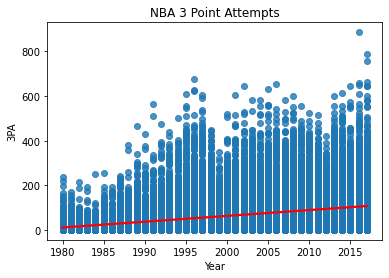

In [15]:
sns.regplot(x='Year', y='3PA', data=data_frame,
           line_kws={"color": "red"}).set(title='NBA 3 Point Attempts')

We can see that with a rise of 3 point attempts over the years, this caused a decrease in the amount of 2 point attempts as well. From our literature review, a study noticed that there has been a decrease in 2 point attempts due to the fact that many teams are looking for players who have an empty shot at shooting a 3 point ball. The below scatter plot proves that theory.

[Text(0.5, 1.0, 'NBA 2 Point Attempts')]

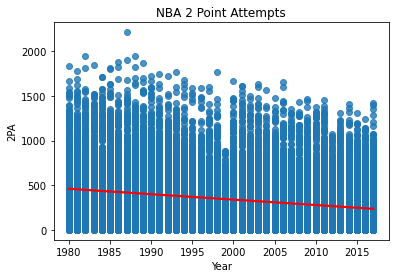

In [16]:
sns.regplot(x='Year', y='2PA', data=data_frame,
           line_kws={"color": "red"}).set(title='NBA 2 Point Attempts')

Free throw percentages have been pretty stagnant over the 35 years. This shows that players have been making sure that their free throw attempts are at a good level as it is a quick and easy way to help the team score additional points. 

[Text(0.5, 1.0, 'NBA Free Throw Percentage')]

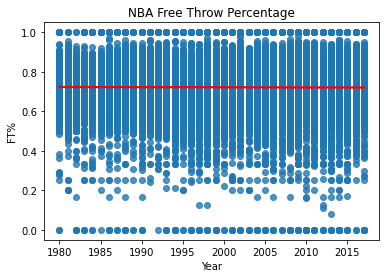

In [17]:
sns.regplot(x='Year', y='FT%', data=data_frame,
           line_kws={"color": "red"}).set(title='NBA Free Throw Percentage')

[Text(0.5, 1.0, 'NBA Field Goal Percentage')]

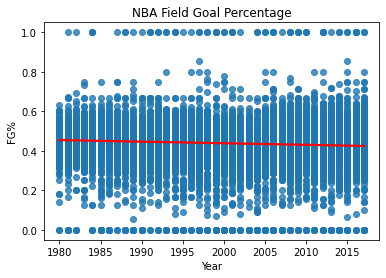

In [18]:
sns.regplot(x='Year', y='FG%', data=data_frame,
           line_kws={"color": "red"}).set(title='NBA Field Goal Percentage')

To see how basketball techniques have evolved throughout the years, we will be comparing two of the most popular players over the decades. We will be comparing Michael Jordan and Stephen Curry. Both of these players have been known as being the best players in the NBA to date. 

In [19]:
michael = data_frame[data_frame["Player"] == 'Michael Jordan*']
steph = data_frame[data_frame["Player"] == 'Stephen Curry']

Text(0.5, 1.0, 'Stephen Curry over the Years')

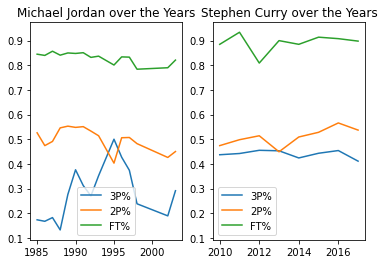

In [20]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(michael['Year'], michael['3P%'])
plt.plot(michael['Year'], michael['2P%'])
plt.plot(michael['Year'], michael['FT%'])
plt.legend(["3P%", "2P%", "FT%"])
plt.title("Michael Jordan over the Years")

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(steph['Year'], steph['3P%'])
plt.plot(steph['Year'], steph['2P%'])
plt.plot(steph['Year'], steph['FT%'])
plt.legend(["3P%", "2P%", "FT%"])
plt.title("Stephen Curry over the Years")

From looking at the graph above, it's clear that Stephen Curry has put a lot more focus and attention on 3 Point throws. There is the spike in 1995 where Michael Jordan's three point percentaged increased but caused a drop in his two point percentage. A reason for this increase in 3P% may be due to the fact that the NBA changed the three point line to be closer for a few years before ultimately moving the three point line back. Stephen Curry has been consistent in all types of shots. Over the years, players have realized that it is important to be consistent in all types of shooting instead of focusing to excel on a certain type. 

#### Initial Results for Question 2

In [21]:
## Replace NaN Values
data_frame['2P%'].fillna(int(data_frame['2P%'].mean()), inplace=True)
data_frame['3P%'].fillna(int(data_frame['3P%'].mean()), inplace=True)
data_frame['AST%'].fillna(int(data_frame['AST%'].median()), inplace=True)
data_frame['BLK%'].fillna(int(data_frame['BLK%'].median()), inplace=True)
data_frame['eFG%'].fillna(int(data_frame['eFG%'].median()), inplace=True)
data_frame['FG%'].fillna(int(data_frame['FG%'].mean()), inplace=True)
data_frame['FT%'].fillna(int(data_frame['FT%'].median()), inplace=True)
data_frame['PER'].fillna(int(data_frame['PER'].mean()), inplace=True)
data_frame['STL%'].fillna(int(data_frame['STL%'].median()), inplace=True)
data_frame['TOV%'].fillna(int(data_frame['TOV%'].median()), inplace=True)
data_frame['TRB%'].fillna(int(data_frame['TRB%'].median()), inplace=True)

## Multinomial Logistic Regression

In [22]:
X = data_frame[list(set(list(data_frame)) - set(['Pos','Player']))]
y = data_frame['Pos']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='saga', max_iter = 10000).fit(x_train, y_train)
model1

LogisticRegression(max_iter=10000, multi_class='multinomial', penalty='none',
                   random_state=0, solver='saga')

In [24]:
y_pred = model1.predict(x_test)
y_pred

array(['PG', 'SG', 'SF', ..., 'PG', 'PF', 'SG'], dtype=object)

In [25]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,C,PF,PG,SF,SG
Actual,,,,,
C,882,197,3,50,3
PF,254,789,1,155,24
PG,1,0,979,9,174
SF,16,187,10,637,207
SG,3,18,154,199,726


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.76      0.78      0.77      1135
          PF       0.66      0.65      0.65      1223
          PG       0.85      0.84      0.85      1163
          SF       0.61      0.60      0.60      1057
          SG       0.64      0.66      0.65      1100

    accuracy                           0.71      5678
   macro avg       0.71      0.71      0.71      5678
weighted avg       0.71      0.71      0.71      5678



In [27]:
# Matthews Correlation Score
matthews_corrcoef(y_test, y_pred)

0.6333200394980081

In [28]:
#Repeated K Fold Cross Validation with a 10 split
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [29]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.704 (0.006)


In [30]:
#Repeated K Fold Cross Validation with a 15 split
cv_15 = RepeatedKFold(n_splits=15, n_repeats=3, random_state=1)
scores_15 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv_15, n_jobs=-1)

In [31]:
print('Accuracy: %.3f (%.3f)' % (mean(scores_15), std(scores_15)))

Accuracy: 0.704 (0.011)
